# <center>Diffusjonsvektet MRI: et bilde av vannmolekylers virrevandring</center>
### <center> Biofysikk prosjekt, TMA4320 Introduksjon til vitenskaplige beregninger </center>
#### <center> Innleveringsfrist: Mandag 6. februar 2023 </center>
#### <center> Gruppemedlemmer: Eva Weiss, Paul Marino, Anja Ringstad </center>

### Introduksjon
Dette prosjektet handler om måling av diffusjon i og rundt kreftsvulster ved hjelp av diffusjonsvektet MRI. MRI står for magnetisk resonansavbildning, og måler diffusjonsevnen til vannmolekyler i kroppen. Diffusjonsevnen er et mål på hvor enkelt molekyler beveger seg i en gass eller væske. Når molekylene møter på flere hindringer i tettere vev er diffusjonsevnen lavere der. Dette kan brukes til å få et bilde av kreftsvulster som har høyere celletettheten enn friskt vev. På avbildningene vil friskt vev se mørkt ut, og en svulst, med flere celler per areal, vil se lysere ut. I dette prosjektet skal vi simulere diffusjonen til vann i menneskekroppen ved hjelp av partikler med tilfeldig bevegelse, også kalt virrevandrere. Simuleringene skal være i 1d og 2d. Deretter simuleres kreftsvulster i hjernen som områder med lavere diffusjonsevne, og se hvordan virrevandrerne oppfører seg i og rundt disse. Ved hjelp av bildeprosessering skal vi så kunne oppdage kreftsvulstene.

### <center> Frie virrevandrere i èn og to dimensjoner </center> 

**Oppgave 1a)**

For å sjekke om sannsynlighetstettheten til en normalfordeling med forventingsverdi = 0 og varians $\sigma^2 = at $ er en løsning på diffusjonsligningen må denne settes inn i ligningen. 
Derfor starter man med funskjonen for sannsynlighetstetthet for en normalfordeling med forventningsverdi = 0 og $\sigma^2 = at $ :

$$\varphi = \frac{1}{\sqrt{2\pi at}} e^{-\frac{1}{2}\frac{x^{2}}{at}} 
    \tag{1}$$

og diffusjonsligningen:

$$\partial_t \varphi = D \partial_{xx} \varphi
    \tag{2}$$
med

$$D = \frac{(\Delta x^2)}{2\Delta t}\tag{3}$$

Den partiellderiverte av $\varphi$ med hensyn på t blir

$$\partial_t \varphi = -\frac{1}{2\sqrt{2\pi at}}\frac{e^{-\frac{1}{2}\frac{x^{2}}{at}}}{t} + \frac{1}{2\sqrt{2\pi at}}\frac{x^2e^{-\frac{1}{2}\frac{x^{2}}{at}} }{at^2}\tag{4}$$

og den dobbelt partiellderiverte av $\varphi$ med hensyn på x blir

$$\partial_{xx} \varphi = -\frac{1}{\sqrt{2\pi at}} \frac{e^{-\frac{1}{2}\frac{x^{2}}{at}}}{at} + \frac{1}{\sqrt{2\pi at}} \frac{x^2 e^{-\frac{1}{2}\frac{x^{2}}{at}}}{a^2t^2}\tag{5}$$

setter (4) og (5) inn i (2):

$$a^2t + a(-x^2-2Dt) + 2Dx^2 = 0 \tag{6}$$

Vi får en annengradslikning som kan løses ved hjelp av abc-formelen og vi får to løsninger:

$a = 2D$ eller  $a = \frac{x^2}{t}$

siden a er en konstant må svaret bli $a = 2D$ . 
I oppgave 1 vil $\Delta x = 1 = \Delta t$ og settes vi det inn i (3)  blir $D = \frac{1}{2}$.
Dette gir oss at $\varphi$ er en løsning på (2) dersom a = 2D = 1. 

**Oppgave 1b)** 

Beveglesen til en enkelt virrevandrer kan beskrives som en stokastisk prosess, beskrevet av ligningen


\begin{equation}
  X(t + \Delta t) =
    \begin{cases}
      X(t) + \Delta x & \text{med sannsynlighet $p_R$}\\
      X(t) - \Delta x & \text{med sannsynlighet $p_L$}\\
    \end{cases}       
\end{equation}


Ved å implementere algoritme #1, kan denne stokastiske prosessen simuleres i en dimensjon.
Som utgangspunktet for simuleringen antas det at virrevandreren befinner seg i origo ved $t = 0$. 

In [1]:
import numpy as np  # Importerer nødvendig modul for å kunne bruke arrays

def enVirrevandrer(M,r):
    
    '''
       Simulerer bevegelsen til en enkelt virrevandrer i èn dimesjon, starter i origo
       -------------------------------------------------------------------------------
       Input: 
       - M = antall tidssteg 
       - r = sannsynlighet for å gå til høyre 
       
       Output: 
       - Array med virrevandres posisjon i rom for hvert tidssteg 
       - Array med tidssteg   
    '''
    
    # Konstanter 
    dx = 1                                       # Endring i posisjon ved hvert tidssteg 
    dt = 1                                       # Tidssteg 
    
     
    positions = np.zeros(M)                      # Array for virrevandrers posisjon 
    tid = np.arange(0, M, dt)                    # M jevnt fordelte tidspunkter 

    random_num = np.random.uniform(0, 1, M-1)    # Array med M-1 tilfeldige tall mellom 0 og 1 
    
    
    # Simulerer virrevandrers bevegelser i èn dimensjon 
    for i in range(1, M):
        if random_num[i-1] < r:
            positions[i] = positions[i-1] + dx
        else:
            positions[i] = positions[i-1] - dx

    return positions, tid                        # Returnerer array med virrevandrers posisjon i hvert tidspunkt t 
                                                 # samt array med alle tidspunktene t 


**Oppgave 1c)**

Funksjonen som implementerer algoritme #1 tar inn sannsynligheten for at virrevandreren går til høyre $p_R$ som parameter. Denne verdien vil ha innvirkning på hvordan virrevandreren beveger seg. Det forventes at dersom $p_R$ f.eks. er lik 0.55, så vil virrevandreren i majoriteten av forflyttningene ha beveget seg til høyre, slik at over tid vil virrevandreren ha beveget seg slik at den befinner seg til høyre for origo. Jo flere tidssteg i simuleringen, jo større vil den samlede forflyttningen mot høyre være,  deremed vil også virrevandrerens posisjon til høyre for origo være mer ekstrem. 


Ved å plotte simuleringer av virrevandrerens bevegelse gjort med $p_R$ lik henholdsvis 0.45, 0.50 og 0.55, vil man kunne vurdere hvorvidt simuleringen er representative for verdien av $p_R$. I denne vurderingen vil også valg av antall tidssteg i simuleringen tas i betraktning.

In [5]:
# Importerer nødvendige moduler for å kunne lage plott
import matplotlib                 
%matplotlib notebook               
import matplotlib.pyplot as plt


# Ulike antall tidssteg 
h = 100
t = 1000


# Simulerer bevegelse med p(r) = 0.45 
r45 = 0.45
R45sim100 = enVirrevandrer(h, r45)
R45sim1000 = enVirrevandrer(t, r45)


# Simulerer bevegelse med p(r) = 0.50 
r50 = 0.50 
R50sim100 = enVirrevandrer(h, r50)
R50sim1000 = enVirrevandrer(t, r50)


# Simulerer bevegelse med p(r) = 0.55
r55 = 0.55 
R55sim100 = enVirrevandrer(h, r55)
R55sim1000 = enVirrevandrer(t, r55)

<IPython.core.display.Javascript object>


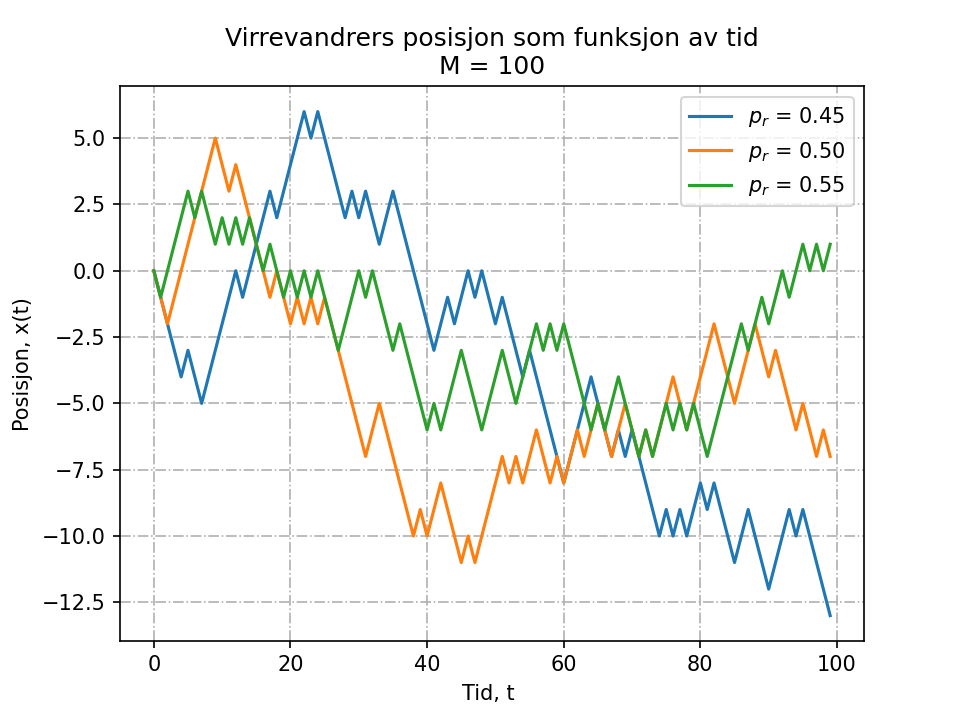

<IPython.core.display.Javascript object>


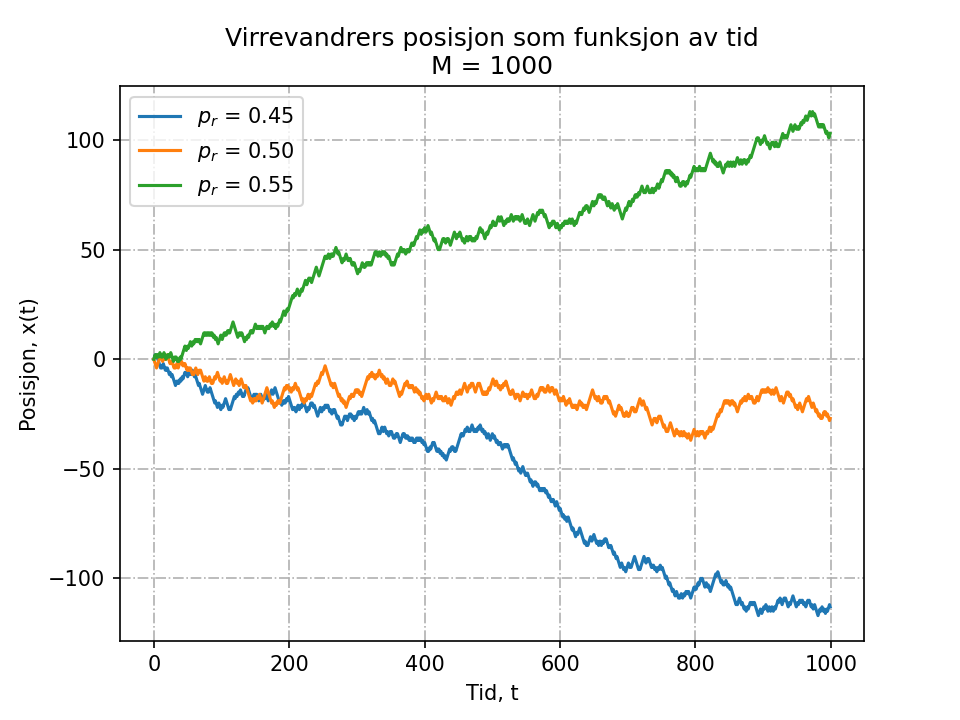

In [6]:
# Lager plott for tilfelle med 100 tidssteg 
plt.figure()
# Plotter data 
plt.plot(R45sim100[1], R45sim100[0], label = f"$p_r$ = 0.45")
plt.plot(R50sim100[1], R50sim100[0], label = f"$p_r$ = 0.50")   
plt.plot(R55sim100[1], R55sim100[0], label = f"$p_r$ = 0.55")

# Formaterer plott 
plt.legend()
plt.grid(ls = "-.")
plt.xlabel("Tid, t ")
plt.ylabel("Posisjon, x(t)")
plt.title(f"Virrevandrers posisjon som funksjon av tid\nM = {h}")
plt.show()



# Lager plott for tilfelle med 1000 tidssteg 
plt.figure()
# Plotter data 
plt.plot(R45sim1000[1], R45sim1000[0], label = f"$p_r$ = 0.45")
plt.plot(R50sim1000[1], R50sim1000[0], label = f"$p_r$ = 0.50")   
plt.plot(R55sim1000[1], R55sim1000[0], label = f"$p_r$ = 0.55")

# Formaterer plott 
plt.legend()
plt.grid(ls = "-.")
plt.xlabel("Tid, t")
plt.ylabel("Posisjon, x(t)")
plt.title(f"Virrevandrers posisjon som funksjon av tid\nM = {t}")
plt.show()



I det nederste plottet er antall tidssteg i simuleringene satt til 1000, det svarer til at virrevandreren forflytter seg 1000 ganger. For det anisotrope tilfellet $p_r$ = 0.55 viser visualiseringen av simuleringen tydelig at virrevandreren i majoriteten av forflyttningene beveger seg mot høyre, slik som forventet med hensyn på verdien av parameteren $p_r$. Også i tilfellet hvor $p_r$ = 0.45 viser plottet at simuleringen er representativ for parameteren $p_R$. For denne verdien av parametern er sannsynligheten for at virrevandreren ved en forflyttning beveger seg mot venstre størst, dermed burde også den samlede forflyttningen over tid være til venstre for origo. Visualiseringen viser at simuleringen samsvarer med denne forventningen ettersom grafen har negativt stigningstall.

Det er også blitt gjort en simulering hvor sannsynligheten for at virrevandreren går til høyre eller venstre er lik, det vil si at simuleringen har isotrope betningelser. For denne simuleringen ble det forventet at virrevandreren over tid i gjennomsnitt befinner seg i origo. Ved å kun betrakte den oransje grafen ($p_r$ = 0.5), kan man obserbere at virrevandreren faktisk tenderer til å bevege seg i området rundt null, slik at den gjennomsnittlige posisjonen over tid nærmer seg null. Også denne oppførselen er representative for simuleringens forhåndsbetningelser. Denne oppførselen kan sees i sammenheng med store talls lov, som sier at det aritmetiske gjennomsnittet av en rekke observasjoner nærmer seg sin forventningsverdi når antallet obsevasjoner er stort. På bakgrunn av denne sammenhengen forventes det at dersom antall tidssteg går mot uendelig vil den gjennomsnittlige posisjonen til virrevandreren konvergere mot null. 

Antallet tidssteg i det første plottet er betydelig lavere, og er satt til 100. I dette plottet kommer ikke de anisotrope/isotrope egenskapene med hensyn på parameteren $p_r$ til virrevanderens bevegelse tydelig frem. Med færre tidssteg får tilfeldige varaiasjoner større utslag, og posisjonen til virrevandreren over tid med hensyn på forhåndsbetningelsene fremstår som vilkårlige, og i noen tilfeller "motstridende". Denne oppførselen er imidlertid forventet ettersom det i en Bernouli forsøksrekke ikke er forventet at en rekke av enhendelse, f.eks. at virrevandreren går til venstre, instantantvil balanseres ut av de andre mulige utfallene. Det er for eksempel ikke slik at dersom man kaster kron to ganger på rad, så vil resultatet i de to neste kastene være mynt for å balansere ut med hensyn på forventningen. Med utgangspunkt i denne oppførselen, ser man at 100 tidssteg ikke er et tilstrekkelig antall tidssteg for at  simuleringen skal være være representativt med hensyn på parameteren $p_r$.

**Oppgave 1d)** 

I dette prosjektet ønsker man å simulere diffusjon av vannmolekyler i hjernen. For å kunne gjøre denne simuleringen representativ for forholdene i hjernen må man kunne simulere den tilfeldige bevegelsen til mange vannmolekyler samtidig. Funksjonen i denne oppgaven implementerer algoritme # 1 for N virrevandrere samtidig. Kodehastighet ble ikke vektlagt i denne oppgaven, det ble heller prioritert at koden skulle være lett å lese og forstå. 

In [8]:
def mangeVirrevandrere(M, r, N): 
    
    '''
       Simulerer bevegelsen til N virrevandrere i èn dimensjon, har utgangspunkt i origo
       ---------------------------------------------------------------------------------
       Input: 
       - M = antall tidssteg 
       - r = sannsynlighet for å gå til høyre
       - N = antall virrevandrere
       
       OutPut: 
       - Matrise som inneholder posisjonene til de N virrevandererne ved hvert tidssteg 
         Hver rad representerer en enkelt virrevandrer, og hver kolonne et tidspunkt 
    ''' 
    
    # Konstanter  
    dt = 1                # Tidssteg 
    dx = 1                # Endring i posisjon ved hvert tidssteg 
    
    
    # Matrise for å holde på posisjonen til de N virrevandrene ved hvert tidssteg 
    posisjon = np.zeros((N, M)) 
    
    # Matrise med N-1xM-1 tilfeldige tall mellom 0-1
    tilfeldigeTall = np.random.uniform(0,1, size = (N-1,M-1)) 
    
    
    # Simulerer virrevandringen til N ulike virrevandrer i en dimensjon med utgangspunkt i origo 
    
    for i in range(0, N):                                  # Itererer gjennom alle radene 
        for j in range(1, M):                              # Itererer gjennom alle kolonnene 
            if tilfeldigeTall[i-1][j-1] < r: 
                posisjon[i][j] = (posisjon[i][j-1] + dx)
            else: 
                posisjon[i][j] = (posisjon[i][j-1] - dx)
             
            
    return posisjon                                       # Returnerer matrise hvor hver rad inneholder posisjonene 
                                                          # til èn virrevandrer ved alle tidspunktene t, dvs hver rad representerer en virrevandrer  


**Oppgave 1e)** 

Funksjonen laget i denne deloppgaven simulerer også bevegelsen til N virrevandrer samtidig, akkurat som den i deloppgave d). Hensikten med denne oppgaven var derfor å optimalisere kodehastigheten til funksjonen ettersom dette er viktig for å holde tidsbruken til den fullstendige simuleringen på et fornuftig nivå. 

Til forskjell fra matrisen som returneres av funksjonen fra forrige oppgave, representerer hver rad i matrisen som returneres i den optimaliserte funksjonen et tidspunkt, mens  kolonnene representerer hver enkelt virrevandrer. Dette formateringen av matrisen ble gjort med hensyn på hvordan dataene benyttes på seinere tidspunkt når blant annet variansen i virrevanderenes posisjon beregnes. Dersom man ønsker matrisen på samme form som i oppgave 1d) kan den transponeres med *.transpose()*. 

In [9]:
def mangeVirrevandrereOptimalisert(M, r, N):
    
    '''
       Simulerer bevegelsen til N virrevandrere i èn dimensjon, har utgangspunkt i origo, optimalisert kjøretid 
       ----------------------------------------------------------------------------------------------------------
       Input: 
       - M = antall tidssteg 
       - r = sannsynlighet for å gå til høyre
       - N = antall virrevandrere
       
       OutPut: 
       - Matrise som inneholder posisjonene til de N virrevandererne ved hvert tidssteg 
         Hver rad representerer et tidspunkt, og inneholder posisjonen til hver av de N virrevandrene ved dette tidspunktet  
    '''
    
    # Konstanter 
    dt = 1
    dx = 1
    
    # Matrise for å holde på posisjonen til de N virrevandrene ved hvert tidssteg 
    positions = np.zeros((M, N)) 
    
    # Simulerer bevegelsen til N virrevandrere 
    for i in range(1, M):
        positions[i] = np.add(positions[i-1],np.random.choice([1, -1], N, p = [r, r])) 
    
    # Transponerer matrise 
    # positions = positions.transpose()
    
    return positions # Returnerer matrise med posisjonen hvor hver rad inneholder posisjonen til hver av de N 
                     # virrevandrene ved tidspunkt t, dvs hver rad svarer til et tidspunkt t 
    

In [10]:
# Importerer nødvendige moduler 
import timeit

# Sammenligner kjøretider
# Parametere for å teste kjørehastiget:
M = 1000
r = 0.5 
N = 1000


# mangeVirrevandrere:
start_tid = timeit.default_timer()               # Begynner å ta tiden 

mangeVirrevandrere(M, r, N)                      # Kjører program 

tidsbruk = timeit.default_timer() - start_tid    # Beregner tidsbruk 



# mangeVirrevandrereOptimalisert 
start_tid = timeit.default_timer()                              # Begynner å ta tiden 

mangeVirrevandrereOptimalisert(M, r, N)                         # Kjører program 

tidsbruk_optimalisert = timeit.default_timer() - start_tid      # Beregner tidsbruk 


# Printer ut resultater 
print(f'\nParametere for simulering: M = 1000, N = 1000, p(r) = 0.5')
print("----------------------------------------------------------")
print(f"Kjøretid 'mangeVirrevandrere': {round(tidsbruk, 5)} sek.")
print(f"Kjøretid optimalisert versjon, 'mangeVirrevandrereOptimalisert': {round(tidsbruk_optimalisert, 5)} sek.")
print(f"Resultatene viser at den optimalisert versjonen av programmet er ca. {round(tidsbruk/tidsbruk_optimalisert)} ganger raskere.\n")




Parametere for simulering: M = 1000, N = 1000, p(r) = 0.5
----------------------------------------------------------
Kjøretid 'mangeVirrevandrere': 1.79676 sek.
Kjøretid optimalisert versjon, 'mangeVirrevandrereOptimalisert': 0.11601 sek.
Resultatene viser at den optimalisert versjonen av programmet er ca. 15 ganger raskere.



Sammenligningen av kodehastigheten til de to ulike funksjonene viser at den optimaliserte versjonen av simuleringen  er betydelig raskere enn den orginale simuleringen. En viktig årsak til at den optimaliserte funksjonen er så mye raskere er at den kun inneholder èn for-løkke. Dette svarer til at algoritmen som implementeres har lineær kompleksitet. Det vil si at antall iterasjoner av for-løkken øker lineært med input, og i dette tilfellet må for-løkken gjennomføres M-1 ganger for å implementere algoritmen. I big-O notasjon; O(M-1), det vil si at for M = 4, så må programmet gjennomføre 3 operasjoner for implementasjonen av den gitt algoritmen.  


Den originale funksjonen har algoritmen derimot kvadratisk kompleksitet som følge av den nøstede for-løkken. 
I dette tilfellet vil den indre løkken gjennomføres M-1 ganger for hver gang den ytre løkken-gjennomføres. Det vil si at koden i den indre løkken gjennomføres Nx(M-1) ganger. Fordi if og else setningene i den indre løkken i dette tilfellet kun gjennomføres en gang (O(1)) for hver gang den indre løkken gjennomføres, vil den totale antallet iterasjoner som må gjennomføres for å implementer algoritmen være lik Nx(M-1), i big O notasjon;
O(Nx(M-1)). Det vil si at dersom vi har fire virrevandrer og fire tidssteg slik som i forrige eksempel, 
må programmet gjøre 12 operasjoner for å gjennomføre den samme simuleringen det optimalisert programmet får til på 3 steg, dette uavhengig av antall virrevandrere. 

Når vi lager simulasjoner hvor N, M = 1000 vil dette følgelig har stor betydning for kodehastigheten. 
Med den originale funksjonen, O(Nx(M-1)) må det gjennomføres hele 1000x(1000-1) = 999 000 operasjoner, mens det i den optimaliserte funksjonen, O(M-1) kun må gjennomføres 999 oprasjoner. Denne dramatiske reduksjonen i antall oprasjoner øker natruligvis kodehastigheten betydelig. Det også blitt benyttet NumPy funksjoner der det er mulig, hvilket ytterligere optimalisere koden. Særlig bruken av arrays er en viktig faktor for optimalisering, da disse krever mye mindre plass i minnet for å lagre data, contra lister. 

**Oppgave 1f)** 

I denne oppgaven ønsket man å undersøke hvordan den empiriske variansen i virrevandrernes posisjon avhenger av tiden. For å gjøre dette ble den emprisike variansen plottet som funksjon av tid, og en kruvetilpassning med testløsningen $f(t) = at$ ble fremstilt for denne grafen. Testløsningen ble valgt på bakgrunn av teori, og det ble forventet at stigningstallet til kruvetilpassningen kom til å være tilnærmet lik 1, gitt sammenhengen i 1a). 

In [11]:
# Importerer nødvendige moduler  
import statistics 
import scipy 
from scipy.optimize import curve_fit


def varians(posisjon, M): 
    
    '''
       Funksjon som finner den empiriske variansen i de N virrevandrenes posisjon ved hvert tidspunkt t
       ------------------------------------------------------------------------------------------------
       Input: 
       - Posisjon = MxN-matrise med de N virrevandrenes posisjon ved hvert tidspunkt t 
         Hver rad inneholder posisjonene til de N virrevandrene ved tidspunkt t 
       - M = antall tidssteg 
       
       Output:
       - Array med empirisk varrians i posisjon ved hvert tidspunkt t 
    
    '''
    
    # Array for å holde på varians
    varians = np.zeros(M)
    
    # Finner variansen ved hvert tidspunkt t 
    for i in range(0,M): 
        varians[i] = statistics.variance(posisjon[i])  # Finner variansen i virrevandrenes posisjoner ved tidspunkt t 
        
    
    return varians  

<IPython.core.display.Javascript object>


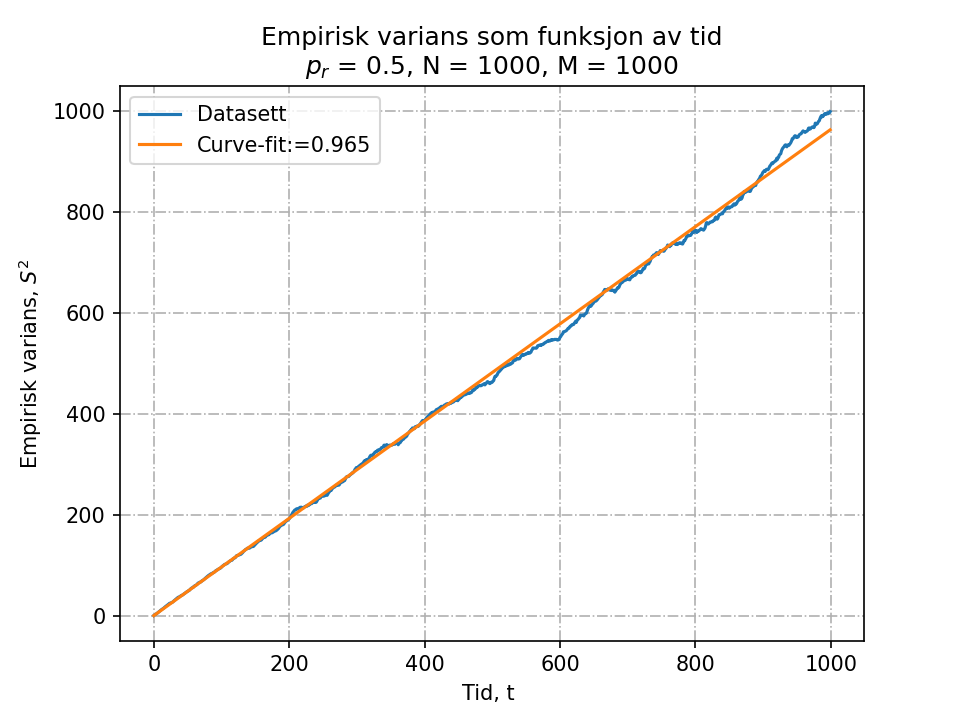

In [12]:
# Fra oppgave 1a) har vi at variansen skal være gitt ved sammenhengen a*t 
# Bruker denne sammenhengen som testløsnig ved kurvetilpassning av varians som funksjon av tid   

# Funksjon med testløsning gitt ved a*t 
def test(x,a): 
    return a*x

 # Simulerer bevegelsen til N = 1000 virrevandrere, M = 1000, p(r) = 0.5
posisjon = mangeVirrevandrereOptimalisert(M, r, N) 

# Finner empirisk varians
empVarians = varians(posisjon, M)                  
tid = np.arange(0, M, 1)


# Lager kruvetilpassning 
stigningstall, covarians_stigningstall = scipy.optimize.curve_fit(test, tid, empVarians)


# Lager plott med varians i datasett som funksjon av tid samt kurvetilpassning 
plt.figure()
plt.plot(tid, empVarians, label = "Datasett")                                               # Datasett
plt.plot(tid, test(tid, stigningstall), label = "Curve-fit:=%5.3f" % tuple(stigningstall))  # Kurvetilpassning 

# Formaterer plott 
plt.xlabel("Tid, t ")
plt.ylabel(f"Empirisk varians, $S^2$")
plt.title(f"Empirisk varians som funksjon av tid\n$p_r$ = 0.5, N = {N}, M = {M}")
plt.grid(ls="-.")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


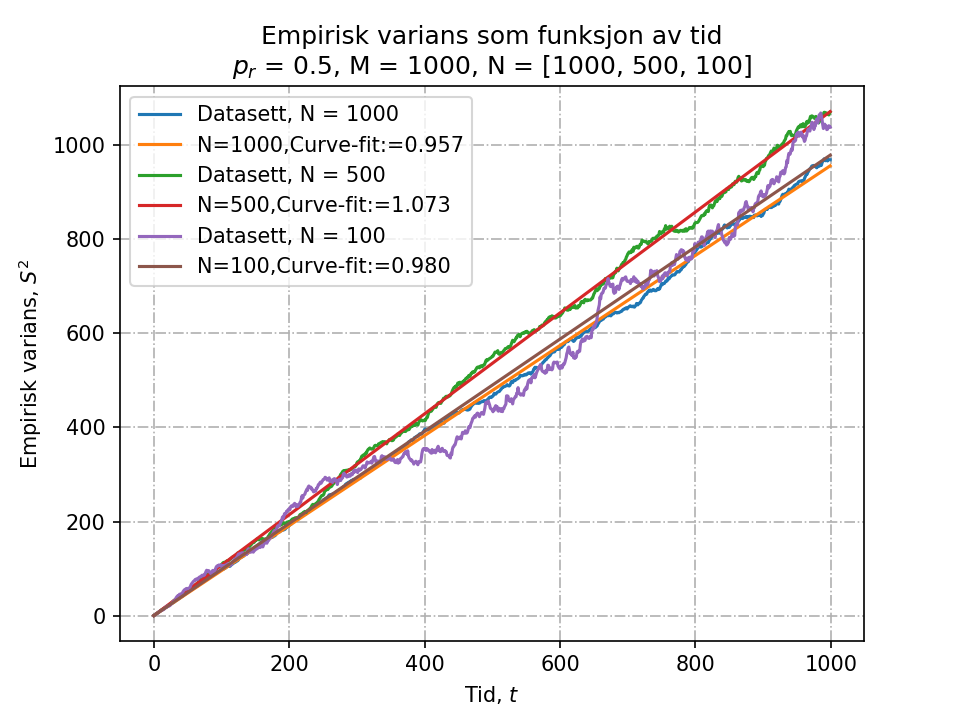

<IPython.core.display.Javascript object>


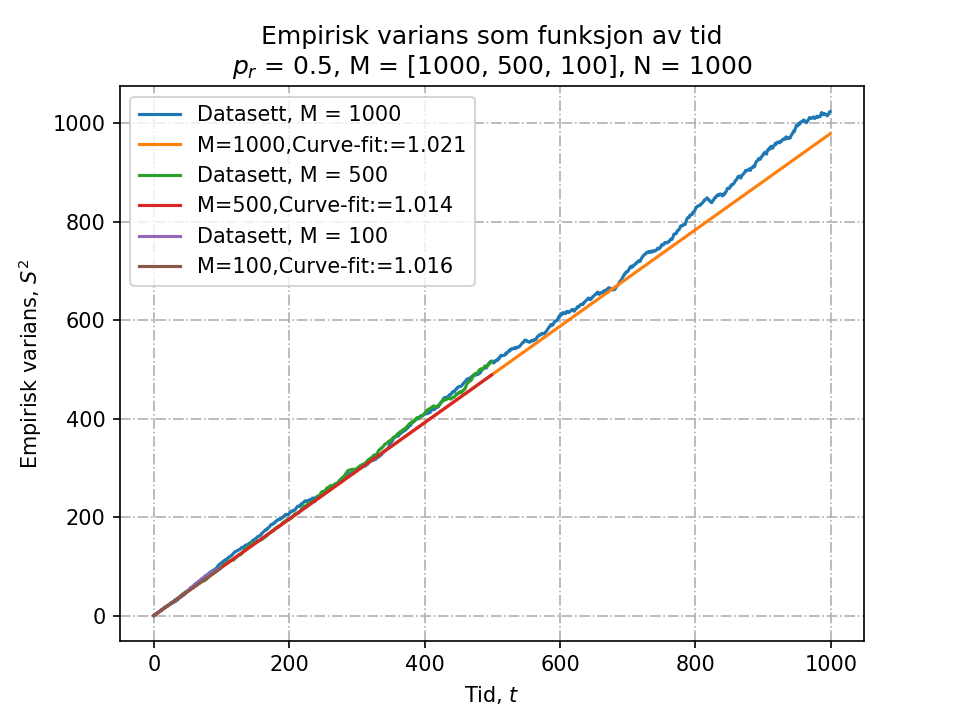

In [13]:
# Liste med ulike verdier er for N   
flerN = [1000, 500, 100] 

# Lager plott hvor antall virrevandrere N varrieres for å observere hvordan dette påvirker den empiriske variansen
plt.figure()  

for i in range(len(flerN)): 
    posisjon_flerN = mangeVirrevandrereOptimalisert(M, r, flerN[i])  # Simulerer bevegelsen 
    empVarians_flerN = varians(posisjon_flerN, M)                    # Finner den empiriske variansen i posisjon 
    
    # Finner kurvetilpassning 
    stigningstall_flerN, covarians_stigningstall_flerN = scipy.optimize.curve_fit(test, tid, empVarians_flerN) 
    
    # Plotter resultat 
    plt.plot(tid, empVarians_flerN, label = f"Datasett, N = {flerN[i]}")  
    plt.plot(tid, test(tid, stigningstall_flerN), label = f"N={flerN[i]},Curve-fit:=%5.3f" % tuple(stigningstall_flerN))

# Formaterer plott 
plt.legend()
plt.grid(ls = "-.")
plt.ylabel(f"Empirisk varians, $S^2$")
plt.xlabel("Tid, $t$")
plt.title(f"Empirisk varians som funksjon av tid\n$p_r$ = 0.5, M = 1000, N = [1000, 500, 100]")
plt.show()



# Liste med ulike verdier for M     
flerM = [1000, 500, 100]

# Lager plott hvor antall tidssteg M varrieres for å observere hvordan dette påvirker den empiriske variansen
plt.figure()
for i in range(len(flerM)): 
    posisjon_flerM = mangeVirrevandrereOptimalisert(flerM[i], r, N)  # Simulerer bevegelsen
    empVarians_flerM = varians(posisjon_flerM, flerM[i])             # Finner den empiriske variansen i posisjon 
     
    tid_flerM = np.arange(0, flerM[i], 1)                            # Array med tidspunkter 
    
    # Finner kurvetilpassning 
    stigningstall_flerM, covarians_stigningstall_flerM = scipy.optimize.curve_fit(test, tid_flerM, empVarians_flerM)
    
    # Plotter resultat 
    plt.plot(tid_flerM, empVarians_flerM, label = f"Datasett, M = {flerM[i]}")
    plt.plot(tid_flerM, test(tid_flerM, stigningstall_flerN), label = f"M={flerM[i]},Curve-fit:=%5.3f" % tuple(stigningstall_flerM))

# Formaterer plott 
plt.legend()
plt.grid(ls = "-.")
plt.ylabel(f"Empirisk varians, $S^2$")
plt.xlabel("Tid, $t$")
plt.title(f"Empirisk varians som funksjon av tid\n$p_r$ = 0.5, M = [1000, 500, 100], N = 1000")
plt.show()


Ut i fra plottene ovenfor ser man at den empiriske variansen i posisjonene til de N virrevandrerne øker med tiden.
Med hensyn på kurvetilpassningen og den valgte testløsningen, kommer det frem at denne sammenhengen er lineær;  $Var(X(t)) = at$. Stigningstallet a til den rette linjen fremstilt med kruvetilpassningen hvor N = M = 1000 er tilnærmet lik en. Dette resultatet samsvar med forventet verdi med bakgrunn i utledningen i oppgave 1a).


I dette tilfellet gjøres simuleringene under betingelsen at sannsynligheten for å gå til høyre er lik en halv, det vil si at virrevandrernes "random walk" er symmertisk. Man har altså at; 


$$\begin{equation}
  X(t + \Delta t) =
    \begin{cases}
      X(t) + \Delta x & \text{med sannsynlighet $p_R=0.5$}\\
      X(t) - \Delta x & \text{med sannsynlighet $p_L=0.5$}\\
    \end{cases}       
\end{equation} \tag{6}$$

Med steglengde $\Delta x$ definert til å være en, får man at 
$$P(\Delta x = 1) = P(\Delta x = -1) = 0.5\tag{7}$$ 
Av ligning (7) følger det at $$E(\Delta x) = 0 ,  Var(\Delta x) = 1\tag{8}$$

Posisjonen til en enkelt virrevandrer ved et tidspunkt t er gitt ved den kumulative summen; 
$$X(t) = \Delta x_0 + \Delta x_1 + ... + \Delta x_t = \sum_{i=0}^{t} \Delta x_i\tag{9}$$  

Gitt ligning (8) og (9), følger det at $$E(X(t)) = E(\sum_{i=0}^{t} \Delta x_i) =  \sum_{i=0}^{t} E(\Delta x_i) = t\cdot E(\Delta x) = 0\tag{10}$$
$$ Var(X(t)) = Var( \sum_{i=0}^{t} \Delta x_i) = \sum_{i=0}^{t} Var(\Delta x_i) = t \cdot Var(\Delta x) = t \tag{11}$$

Variansen i et tidspunkt t er altså gitt som den kumulative summen av variansen i alle de foregående tidsstegene pluss variansen i virrevandrernes posisjon ved tidspunktet t. I utgangspunktet gir simuleringen hvor N = M = 1000 et resultat som stemmer godt med teori. I de to neste plottene viser varians som funksjon av tid for simuleringer hvor verdien av henholdsvis N og M varieres. Ut i fra disse plottene og tilhørende kurvetilpassningner kommer det frem at antallet virrevandrere har innvirkning på samsvaret med den teoretiske veriden på stigningstallet a, mens antall tidssteg i liten grad gjør at denne verdien endrer seg. Den variasjonen man ser i verdien a for ulike tidssteg M er mest sannsynlig en konsekvens av den tilfeldige variasjonen i simuleringene. Årsaken til at stigningtallet a i større grad samsvarer med den teoretiske verdien når antallet virrevandere øker, er at et større antall virrevandrere tilsvarer flere observasjoner. Med et større antall observasjoner vil man få individuelle observasjoner som er mer ekstreme, men varaiansen om gjennomsnittet (her null) vil likevel minske. Når variansen i virrevanderenes posisjon betraktes er det nettopp variansen om gjennomsnittet som observeres, dette forklarer hvorfor verdien av stigningstallet a blir nærmer 1 jo flere virrevandrere N som observeres samtidig.  

**Oppgave 1g)**

Nå skal problemstillingen utvides til 2 dimensjoner. Her kan det simuleres isotrope og anistrope systemer ved å ha ulike sannsynligheter for å gå høyre eller opp. I denne oppgaven anntas det at det er like sannsynlig at partikkelen beveger seg horisontalt eller vertikalt, men det kan og tenkes et system hvor dette ikke er tilfellet. For å få et bilde av hvordan flere partikler vil bevege seg skal 4 partikler simuleres i et isotropt system, og 4 i et aniotropt system.

In [15]:
def virreVandrere2D(N,M,pr,pu):
       
    '''
        Simulerer bevegelsen til N virrevandrere i to dimensjoner, har utgangspunkt i origo
        ----------------------------------------------------------------------------------------------------------
        Input: 
        - M = antall tidssteg 
        - pr = sannsynlighet for å gå til høyre
        - pu = sannsynlighet for å gå opp
        - N = antall virrevandrere
   
        OutPut: 
        - array som inneholder posisjonene til de N virrevandererne ved hvert tidssteg 
          Hver rad representerer et tidspunkt, og inneholder posisjonen til hver av de N virrevandrene ved dette tidspunktet
          Den første dimensjonen er x og y aksen
    '''
    
    
    positions = np.zeros((2,M,N)) 
    #Denne blokken lager 2 M*N arrays som inneholder tilfeldige bevegelser i enten x eller y retning. De 2 arrayene er for x og y verdien til bevegelsen
    movementsX = np.random.choice([1,-1], (M,N), p = [pr,1-pr])
    movementsY = np.random.choice([1,-1], (M,N), p = [pu,1-pu])   
    movementsPop = np.random.choice([1,0], (M,N), p = [0.5,0.5])  #movementsPop bestemmer horisontal/vertikal bevegelse
    movementsX = np.multiply(movementsX,movementsPop)            
    movementsPop = -(movementsPop - 1)     
    movementsY = np.multiply(movementsY,movementsPop)
    
    
    #går gjennom tid med for løkker og endrer posisjonene til partiklene med de tilfeldige bevegelsene fra før
    for i in range(1, M):
        positions[0][i] = np.add(positions[0][i-1],movementsX[i])
        positions[1][i] = np.add(positions[1][i-1],movementsY[i])
        
    return positions


<IPython.core.display.Javascript object>


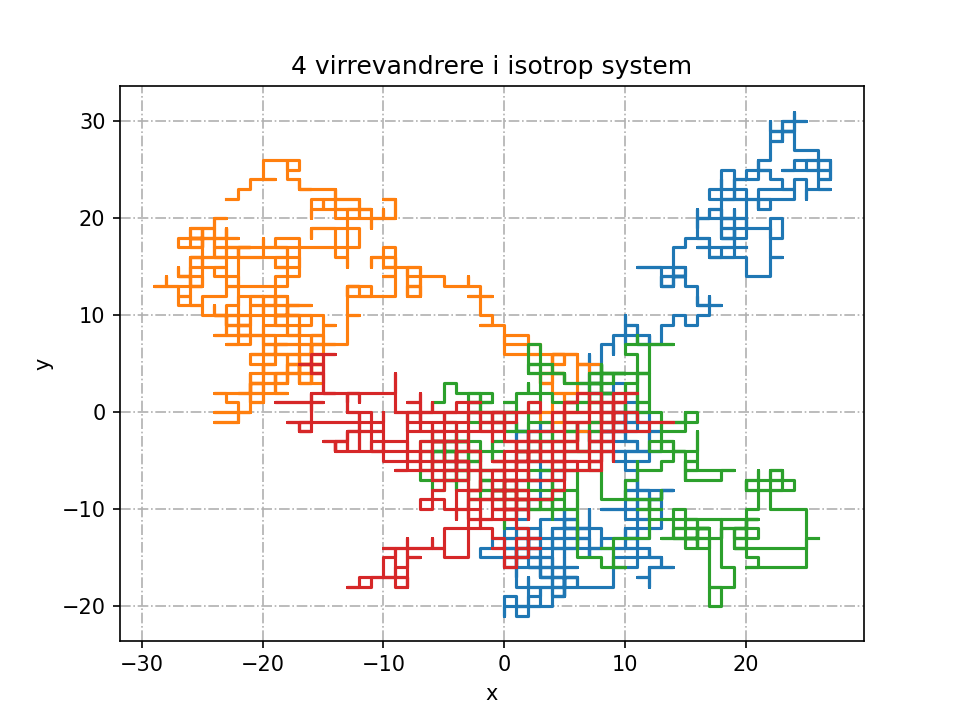

<IPython.core.display.Javascript object>


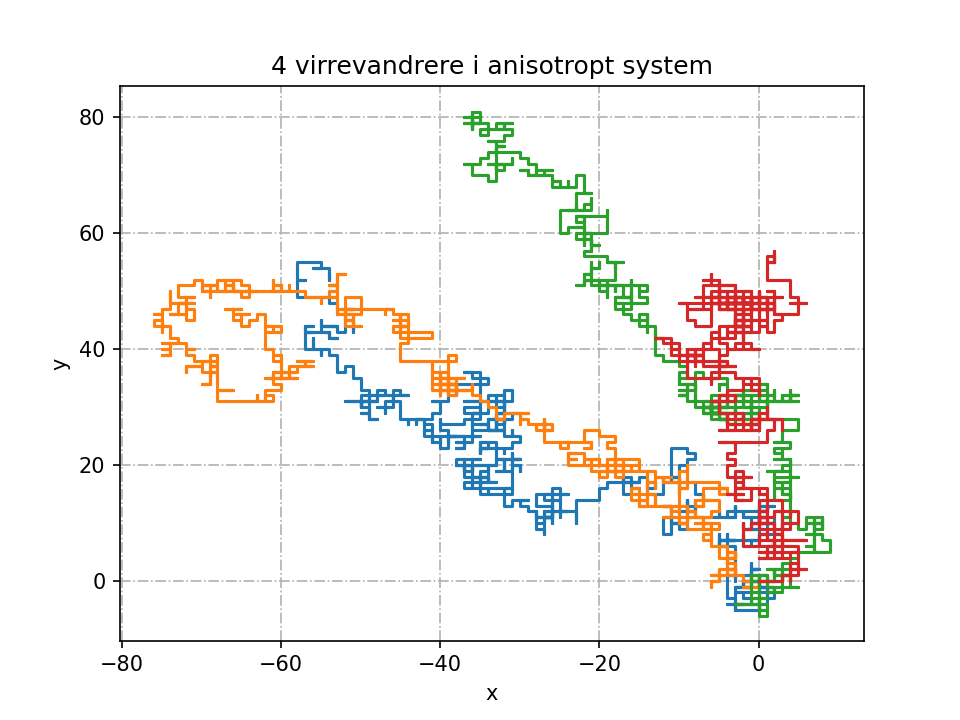

In [31]:
# Genererer plot for 4 partikler i et isotropt og anisotropt system  

firePartiklerIso = virreVandrere2D(4, 1000, 0.5, 0.5)  
firePartiklerAnIso = virreVandrere2D(4, 1000, 0.45, 0.55)  

plt.figure()
plt.plot(firePartiklerIso[0],firePartiklerIso[1], label = 'isotrop')
plt.xlabel('x')
plt.ylabel('y')
plt.title('4 virrevandrere i isotrop system')  # Markere origo? 
plt.grid(ls="-.") 
plt.show()

plt.figure()
plt.plot(firePartiklerAnIso[0],firePartiklerAnIso[1], label = 'anisotrop')
plt.xlabel('x')
plt.ylabel('y')
plt.title('4 virrevandrere i anisotropt system')  # Markere origo? 
plt.grid(ls="-.") 
plt.show()

Fra plottene ses at bevegelsen til partiklene i det anisotrope systemet generelt går opp og til venstre, som samsvarer med at de har større sannsynlighet for å gå venstre, og opp. Hvor klart denne favøriseringen av retninger er varierer fra gang til gang, men det er klart at det ikke er like sannsynlig at partiklene går til høyre som venstre, eller opp som ned. 

I det isotrope systemet er det uforutsigbart hvilken retning de ender opp med å gå. Dette gir mening, siden det er like sannsynlig at de går i alle retninger. 

Ut ifra dette kan vi si at anisotropien er ganske klart i plottet.


**Oppgave 1h)** 

Noe interessant en kan se på er anndelen av partikler som returnerer til origo når tiden går mot uendelig. Dette kan skrives som $P(x=0, t\rightarrow \infty)\$. Man kan enten prøve å løse dette analytisk med kombinatorikk, eller numerisk, ved å simulere virrevandrere og telle opp hvor mange som returnerer til origo. Det er enklere å løse denne kombinatorikken for færre tidssteg, og når en ser på flere tidssteg er det enklere å løse det numerisk.

In [19]:
def returnererTilOrigo(N,M,pr,pu):  
    '''
    Denne funksjonen teller opp hvor mange partikler som er innom origo i det 2 dimensjonale tilfellet
    
    Inputs
    -----
    N  : Anntall partikkler
    M  : Anntall tidssteg
    pr : sannsynlighet for å gå til høyre
    pu : sannsynlighet for å gå opp
    
    Returns
    -----
    Anndel av partikkler som har vært innomm origo
    '''
    n=0                              #partikkler som returnerer til origo
    Nl=np.zeros(M)                     #liste med anntall partikler som returnerer til origo ved et tidspunkt
    part = []                        #liste med partikkler som allerede har vært innom origo
    positions=virreVandrere2D(N, M, pr, pu)   #posisjoner til alle partikler ved ethvert tidspunkt
    for i in range(1,M):
        for j in range(N):
            if positions[0][i][j]==0 and positions[0][i][j]==positions[1][i][j] and j not in part:   #sjekker om en partikkel er i origo ved tid i
                n=n+1
                part.append(j)
        Nl[i]=n
    return Nl/N

Her er en analytiske løsning for små tidssteg.

\$P(x=0, t=1) = 0\$ i både 1 og 2 dimensjoner. Fordi det bare er ett tidssteg kan partiklene ikke komme tilbake til origo.

\$P(x=0, t=2) = 0.5 \$ i 1 dimensjon. Etter det første tidssteget kan den endimensjonale partikkelen enten gå lengere vekk fra origo, eller tilbake, og i et isotropt system vil de to mulighetene ha lik sannsynlighet.
\$P(x=0, t=2) = 0.25\$ i 2 dimensjoner. Etter det første tidssteget er det 3 retninger der partikkelen ikke kommer tilbake til origo, og en der den gjør det. Da er det \$\frac{1}{4}\$ sannsynlighet for at den kommer tilbake til origo etter 2 tidssteg.

**Oppgave 1i)**

Numerisk løsning er hensikstmessig for flere tidssteg. For å kunne se dette kan vi plotte andelen av vandrere som returnerer til origo som funksjon av tid.

<IPython.core.display.Javascript object>


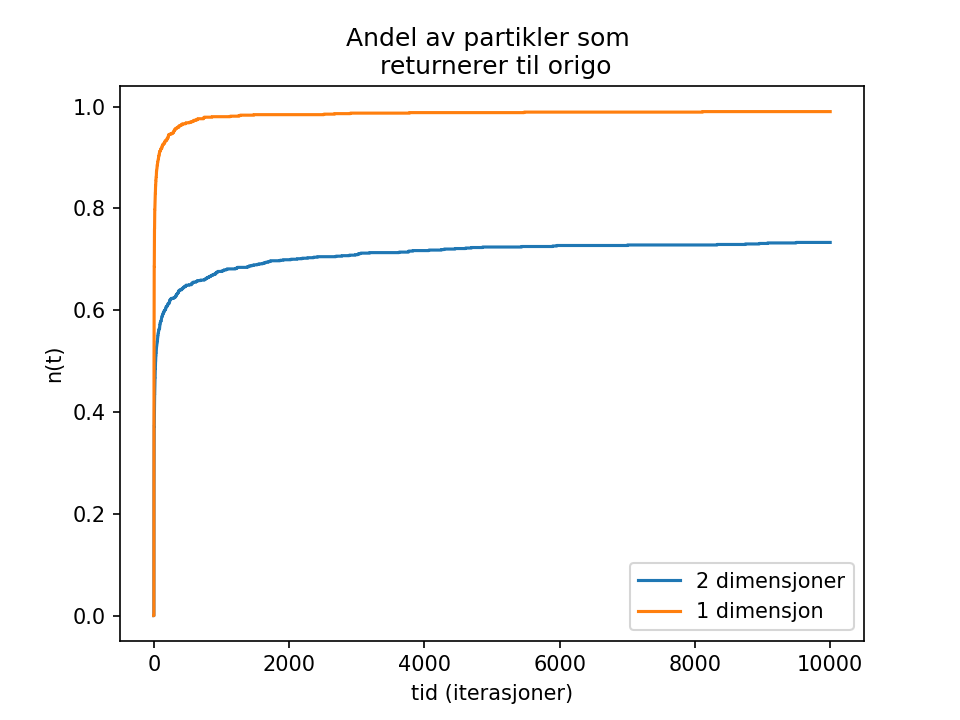

In [20]:
def returnererTilOrigo1D(M,N):    
    '''
    Denne funksjonen teller opp hvor mange ganger partikler er i origo i det 1 dimensjonale tilfellet
    
    Inputs
    -----
    M : anntall tidssteg
    N : anntall partikler
    
    Returns
    -----
    array med andel partikler har kommet tilbake til origo i løpet av M tidssteg
    
    '''
    n=0       #anntall partikler som returnerer til origo
    Nl=np.zeros(M)                 #liste med anntall partikler som returnerer til origo ved et tidspunkt
    part = []                        #liste med partikkler som allerede har vært innom origo
    positions = mangeVirrevandrereOptimalisert(M, 0.5, N)   #posisjoner til alle partikler
    for i in range(1,M):
        for j in range(N):
            if positions[i][j]==0 and positions[i][j]==positions[i][j] and j not in part:  #sjekker om en partikkel er i origo
                n=n+1
                part.append(j)
        Nl[i]=n
    return Nl/N


#her lager vi lister med n(t) for 1000 partikler i de 1 og 2 dimensjonale tilfellene
             
T=10000         #antall tidssteg

N1D = returnererTilOrigo1D(T, 1000)
N2D = returnererTilOrigo(1000,T,0.5,0.5)
timeList = np.arange(0,T,1)



plt.figure()
plt.plot(timeList,N2D, label = "2 dimensjoner")          #begge tilfellene plottes oppå hverandre sånn at man kan se dem og sammenligne
plt.plot(timeList,N1D, label = "1 dimensjon")


plt.xlabel('tid (iterasjoner)')
plt.ylabel('n(t)')
plt.title('Andel av partikler som \n returnerer til origo')
plt.legend()
plt.show()


Grafen er avhengig av parametrene M (anntall tidssteg) og N (anntall partikler). Det å ha flere tidssteg gjør selvfølgelig at vi får en bedre tilnerming av \$P(x=0, t\rightarrow \infty)\$. Høyere N gjør at vi får bedre vertikal oppløsning, fordi det er flere mulige tall for anndelen n(t). Større N vi og føre til at M må bli større for å oppnå like stor n(t). Dette er fordi man må vente på at flere vandrere returnerer til origo.

Det første man legger merke til er at det tar mindre tid for partiklene å returnere til origo i en dimensjon. Man legger og merke til at det er mye variasjon fra ett forsøk til det neste. Derfor er det viktig å ha mange t verdier relativt tett innpå hverandre. Her er det alle M fra 1 til 100000. Vi valgte det fordi man kan se kurvene gjennom støyet, og det tar ikke for lenge å kjøre. Vi valgte å simulere 1000 virrevandrere fordi da er det god vertikal oppløning på grafen, men vi trenger ikke kjøre alt for mange tidssteg for å se at den ikke flater ut.

Fra de analytiske resultatene ville vi forvente at det vil være mer vanlig for partikler å returnere til origo i 1 dimensjon, og dette samsvarer godt med de numeriske resultatene våres. Vi ser og at det er rimlig at n(t) for 1 dimensjon går mot 1. Det ser ikke like klart at n(t) i 2 dimensjoner går mot 1, men man ser at den ikke flater ut helt, så det er helt mulig at den går mot 1 når t går mot uendelig.

### <center>Diffusjon av vannmolekyler i hjernen</center>

**Oppgave 2a)** 

En hensiktsmessig måte å inkludere fysiske konstanter er å ta inn de nødvendige størrelsene i funksjoner, og konvertere dem til tall man kan bruke i arrays før man gjør noe annet. For eksempel finne størrelsen på arrayet som dekker hele området ved å dele lengden i x og y retning på steglengden. Dette vil gi et dimensjonsløst system så til slutt må man passe på å gjøre alt om til relevante størrelser. 

Vi har noen oppgitte verdier fra oppgaven for \$ \Delta x \$ og \$ \Delta t \$ og vi skal finne diffusjonskonstanten i friskt vev for disse verdiene. 

\$D = \frac{(\Delta x)^2}{2 \Delta t} = \frac{0.004^2}{2*0.01}=0.0008 mm^2/s\$ 

Noen virkelige verdier for vev er  \$(0.75± 0.16)10^{-3} mm^2/s\$ og \$(0.83\pm 0.14)10^{-3} mm^2/s\$

Den verdien vi fikk er mellom de to virkelige verdiene, så vi kan si at vi får ganske realistiske verdier for ADC.


**Oppgave 2b)**

For å simulere vandrere i tumorer trengs en hensiktsmessig måte å representere tumorer på. I denne  oppgaven skal vi lage tumorene, og vi representerer dem ved å lage en matrise med effektiv dx i hvert punkt i arealet. Dette er fordi måten partiklenes vandring gjennom tumorer simuleres er at steglengden er kortere når en partikkel er i en tumor.

In [2]:
def genSvulster(nx, ny,lx, ly, dx, m, tk, A, sentrumX, sentrumY):
    '''
    Lager en array med effektiv steglengde i ett rektangulært vev
    -----------------
    Inputs
    -----
    nx       = antall steg langs x retning
    ny       = antall steg langs y retning
    lx       = lengden på planet i x retning
    ly       = lengden på planet i y retning
    dx       = steglengde i friskt vev
    m        = anntall kreftsvulster
    tk       = array med m tumorkoeffisienter
    A        = arealet til tumorene
    sentrumX = x koordinaten til sentrum til tumorene
    sentrumY = y koordinaten til sentrum til tumorene

    Returns
    -----
    effektivdx : array med effektiv steglengde i vevet 

    ''' 
    sentrumX /= (lx/nx)
    sentrumY /= (ly/ny)
    #ny = int(ly//dx)
    #nx = int(lx//dx)
    r = np.sqrt(A/np.pi)/(lx/nx)
    y, x = np.ogrid[-ny/2:ny/2, -nx/2 :nx/2]
    
    effektivdx = np.ones((ny,nx))
    
    for i in range(len(tk)):
        effektivdx = np.where(np.sqrt((sentrumX[i]-x)**2+(sentrumY[i]-y)**2) < r, effektivdx*np.sqrt(tk[i]), effektivdx) 
    
    effektivdx *= dx   #Siden jeg starter et array med enere må jeg gange tk i friskt (her: dx) vev for å få riktig steglengde overalt
    return effektivdx


**Oppgave 2c) og 2d)** 

I disse deloppgavene simuleres bevegelsen til to virrevandrere i et system med 15 tumorer over et tidsintervall med tusen tidssteg. Sentrum til de 15 tumorene plassers tilfeldig innenfor området LxL. Arealet til hver enkelt tumor er $\pi(\Delta x)^2$. Reduksjonskoeffisienten/tumorkoeffisienten $t_k$ er satt lik 0.1.

In [3]:
def virrevandrere_blant_tumorer(N,M,dx,tumorer):
       
    '''
        Simulerer bevegelsen til N virrevandrere i to dimensjoner, har utgangspunkt i origo
        ----------------------------------------------------------------------------------------------------------
        Input:
        - N       = antall virrevandrere
        - M       = antall tidssteg 
        - dx      = steglengde i friskt vev  
        - tumorer = 2d array med den effektive verdien for dx i hvert punkt

   
        OutPut: 
        - Matrise som inneholder posisjonene til de N virrevandererne ved hvert tidssteg 
          Hver rad representerer et tidspunkt, og inneholder posisjonen til hver av de N virrevandrene ved dette tidspunktet
          De to matrisene er x og y verdien hennholdsvis
    '''
    
    pr = 0.5
    pu = 0.5
    nx = len(tumorer[0,:])
    ny = len(tumorer[:,0])
    
    #Oppretter random start-koordinater så ikke alle virrevandrerne starter i origo
    positions = np.zeros((2,M,N))
    startX = np.random.randint(0,nx, size = N)
    startY = np.random.randint(0,ny, size = N)
    positions[0,0,:] = startX
    positions[1, 0, :] = startY
    
    #Denne blokken lager 2 M*N arrays som inneholder tilfeldige bevegelser i enten x eller y retning. De 2 arrayene er for x og y verdien til bevegelsen
    movementsX = np.random.choice([1,-1], (M,N), p = [pr,1-pr])
    movementsY = np.random.choice([1,-1], (M,N), p = [pu,1-pu])   
    movementsPop = np.random.choice([1,0], (M,N), p = [0.5,0.5])  
    movementsX = np.multiply(movementsX,movementsPop)            #movementsPop bestemmer horisontal/vertikal bevegelse
    movementsPop = -(movementsPop - 1)     
    movementsY = np.multiply(movementsY,movementsPop)


    #Går hjennom koordinatene til hver virrevandrer ved et gitt tidssteg t for å sjekke om den er i en tumor
    #Endrer steglengden ut ifra effektiv dx i arealet med friskt vev og tumorer
    for t in range(1,M):
        for n in range(N):
            x =  int(positions[0,t-1,n]+nx/2)
            y =  int(positions[1,t-1,n]+nx/2)
            
            #Bruker try, except for å unngå for høy indeks i tumorer arrayet når en virrevandrer havner utenfor arealet
            try:
                positions[0,t,n] = positions[0,t-1,n]+ movementsX[t-1, n]*np.sqrt(tumorer[-y,x])/dx
                positions[1,t,n] = positions[1,t-1,n]+ movementsY[t-1, n]*np.sqrt(tumorer[-y,x])/dx
            except:
                positions[0,t,n] = positions[0,t-1,n]+ movementsX[t-1, n]
                positions[1,t,n] = positions[1,t-1,n]+ movementsY[t-1, n]
                
            #hvis en virrevandrer havner utafor arealet blir den satt inn igjen på motsatt side
            positions = np.where(positions >= nx/2 ,positions-nx, positions)
            positions = np.where(positions <= -nx/2 ,positions+nx, positions)
    
    return positions


<IPython.core.display.Javascript object>


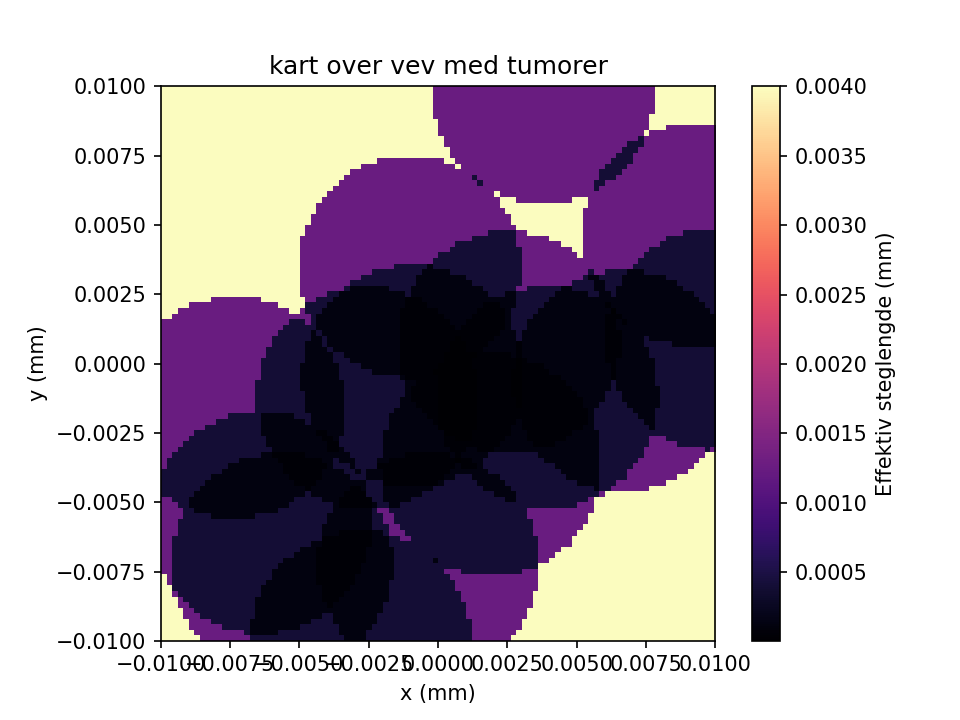

<IPython.core.display.Javascript object>


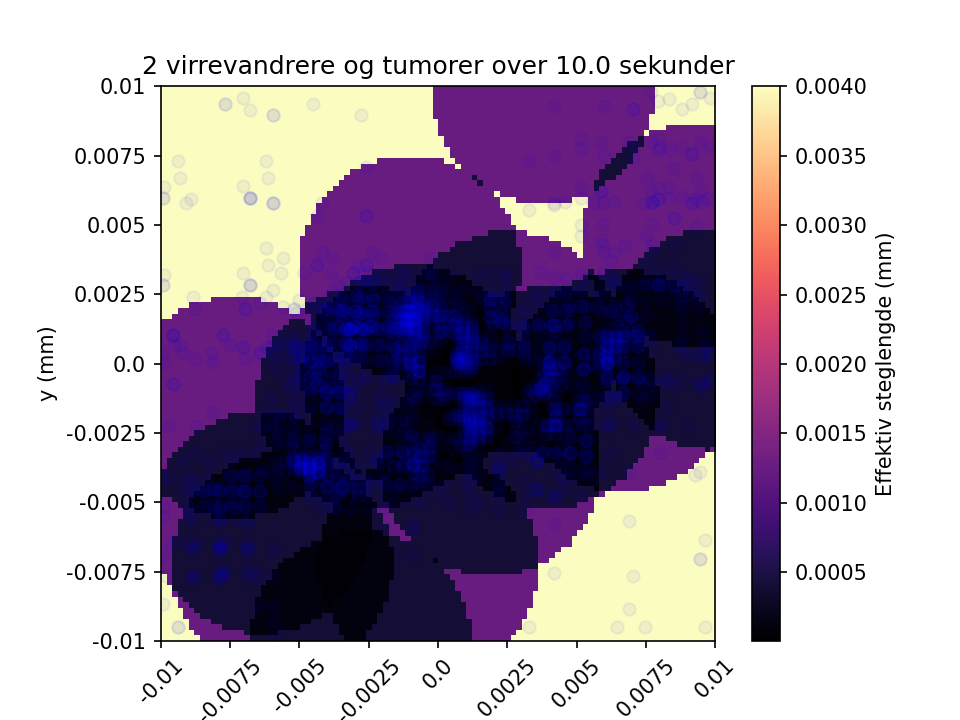

<IPython.core.display.Javascript object>


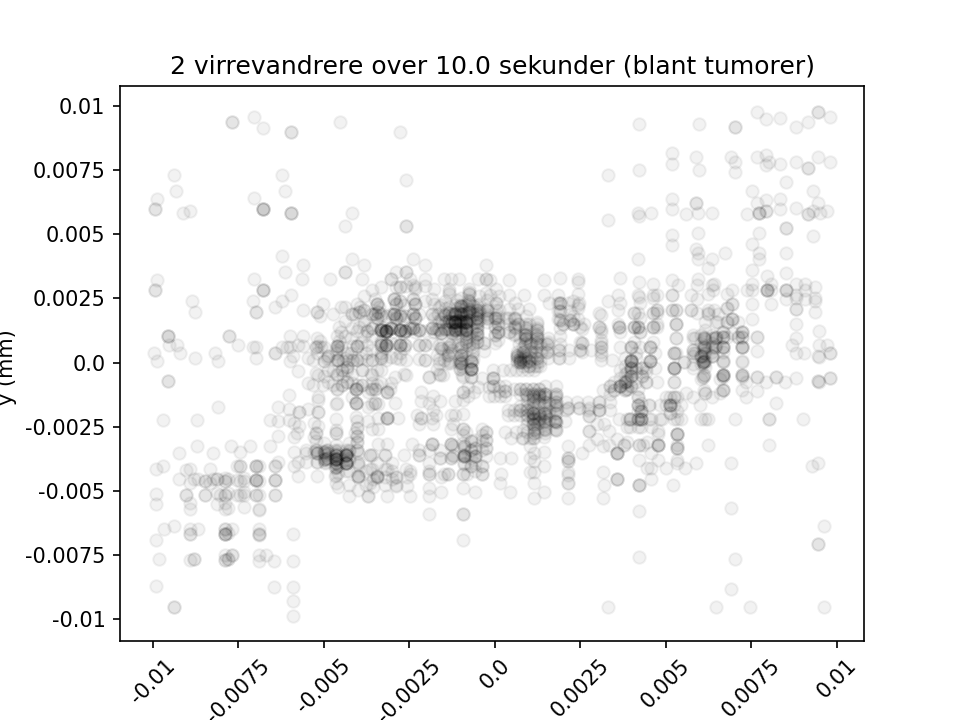

In [12]:
#--------------------paramtre oppg 2c) -----------------------
c_dt = 0.01                            # lengde på et tidssteg (sekunder)
c_M = 1000                             #antall tidssteg
c_N = 2                                #antall virrevandrere
c_antall_tumorer = 15                  #antall tumorer
c_tk = np.ones(c_antall_tumorer)*0.1   #tumorkonstant



c_lx = 0.02                    #lengde boks/areal (mm)
c_ly = 0.02                    #Høyde boks/areal  (mm)
c_dx = 0.004                   #steglengde        (mm)




c_nx = 100                      #antall steg i hele bredden
c_ny = 100                      #antall steg i hele høyden


c_A = np.pi*c_dx**2             #areal tumorer (mm^2)


c_sentrumX = np.random.uniform(-c_lx/2, c_lx/2, c_antall_tumorer)   # x-koord til sentrum til m tumorer (mm)
c_sentrumY = np.random.uniform(-c_ly/2, c_ly/2, c_antall_tumorer)   # y-koord til sentrum til m tumorer (mm)


#-----------------------simulering/plott oppg 2c) -------------------------------------

c_tumorer_i_areal = genSvulster(c_nx, c_ny, c_lx, c_ly,c_dx,  c_antall_tumorer, c_tk, c_A, c_sentrumX, c_sentrumY)
c_pos_vandrere = virrevandrere_blant_tumorer(c_N,c_M,c_dx,c_tumorer_i_areal)

#Plotter kun tumorer:
plt.figure()
plt.imshow(c_tumorer_i_areal, extent = [-c_lx/2, c_lx/2, -c_ly/2 , c_ly/2], cmap='magma' )
plt.title("kart over vev med tumorer")
cbar = plt.colorbar()
cbar.set_label("Effektiv steglengde (mm)")
plt.xlabel(f"x (mm)")
plt.ylabel(f"y (mm)")
plt.show()



#Plotter virrevandrere og tumorer:
plt.figure()
plt.imshow(c_tumorer_i_areal, extent = [-c_nx/2, c_nx/2, -c_ny/2 , c_ny/2], cmap='magma' )
cbar = plt.colorbar()
cbar.set_label("Effektiv steglengde (mm)")
plt.scatter(c_pos_vandrere[0],c_pos_vandrere[1], c = "blue", alpha = 0.05)                      #bruker scatter så man får virrevandrere som en punkt per tidssteg
plt.xticks(np.linspace(-c_nx/2,c_nx/2,9 ),np.linspace(-c_lx/2,c_lx/2,9).round(4), rotation=45)  # Setter verdier på x-akse
plt.yticks(np.linspace(-c_ny/2,c_ny/2,9 ),np.linspace(-c_ly/2,c_ly/2,9).round(4))               # Setter verdier på y-akse
plt.title(f"{c_N} virrevandrere og tumorer over {c_dt*c_M} sekunder")
plt.xlabel(f"x (mm)")
plt.ylabel(f"y (mm)")
plt.show()


#Plotter kun virrevandrere
plt.figure()
plt.scatter(c_pos_vandrere[0],c_pos_vandrere[1], c = "black", alpha = 0.05)
plt.xticks(np.linspace(-c_nx/2,c_nx/2,9 ),np.linspace(-c_lx/2,c_lx/2,9).round(4), rotation=45)  # Setter verdier på x-akse
plt.yticks(np.linspace(-c_ny/2,c_ny/2,9 ),np.linspace(-c_ly/2,c_ly/2,9).round(4))               # Setter verdier på y-akse
plt.title(f"{c_N} virrevandrere over {c_dt*c_M} sekunder (blant tumorer)")
plt.xlabel(f"x (mm)")
plt.ylabel(f"y (mm) ")
plt.show()


Kommentar funksjon(si hvilken funksjon): Tar ikke inn x og y koordinater, men oppretter heller disse med np.ogrid() inne i funksjonen for at det skal funke med np.where(). Derfor måtte vi ta inn lengden i x og y retning (lx og ly) i tillegg til nx og ny for å endre oppløsning. Vi har også valgt å ta inn dx selv om denne skal være 0.004 i hele oppgave 2. 


Figuren viser tumorene som vil bli generert på tilfeldige steder. Når det ligger flere tumorer over hverandre er det tydelig at effektiv steglengde i vevet blir mindre. De mørkeste områdene har lavest steglengde. Friskt vev har høyest steglengde, her 0.004mm. Dette blir i figuren gult. Når man ser på virrevandrerne blant tumorene er det også tydelig at hastigheten minker der det er lavere effektiv steglengde, og at det er tydeligst der denne er lavest. Dette svarer til forventet bilde av tumorer og virrevandrere.

Vi valgte å implementere «torusen» som grensebetingelse. Når en virrevandrer havner på eller utenfor randen av arealet vi ser på, vil denne bli sendt inn igjen på motsatt side. 
Fordelene med dette er at man alltid har like mange virrevandrere innenfor området, og dermed ikke får mindre data når disse forsvinner. Det vil også være mer realistisk enn «harde vegger» med tanke på diffusjon i vev, siden det jo ikke er harde vegger i virkelig vev når vi ser på et tilfeldig areal. Vi kom fram til at torus-grensebetingelsen ville vært mest hensiktsmessig for diffusjon i vev, siden det kan simulere at en partikkel går ut av område mens en annen går inn. Og vi antar at systemet er i likevekt og da er partikkeltettheten den samme hele tida.
Selvfølgelig er dette ikke helt virkelighetstro siden det aldri er nøyaktig like mange partikler i et område hele tida, men over lenger tid vil det være en ganske god tilnærming. 
Et problem vi støtte på var at det ble vanskeligere å plotte bevegelsen til virrevandrerne. Når de hopper fra en side til den andre vil man få en strek over hele arealet. Vi løste dette med å bruke scatter plott.


**Oppgave 2e)**

Skrive liten intro til funksjonen, hva den gjør

In [8]:
def hjerneIntensitet(nx,ny, virrevandrere):
    '''
    Funksjonen måler antall ganger en virrevandrer har vært innenfor en rute dx*dy 

    Input
    ----------
    nx            = bestemmer oppløsning x-akse, høyre nx = høyere oppløsning
    ny            = bestemmer oppløsning y-akse
    virrevandrere = array med x- og y-koordinat til N virrevandrere ved M tidssteg
    
    Returns
    -------
    2D matrise med intensiteten til virrevandrerne i hver av cellene med areal dx*dy

    '''
    #lager en 1d liste for alle x og y verdier
    x = virrevandrere[0]
    x = x.flatten()
    y = virrevandrere[1]
    y = y.flatten()
    
    #bruker histogram2d for å telle antall ganger en partikel befinner seg i et område: dx*dy, areal bestemt av antall bins
    Intensitet,xedges, yedges  = np.histogram2d(x, y, bins = [nx,ny] , density = True) 
    
    Intensitet = np.rot90(Intensitet)
    return Intensitet

Kommentar funksjon: Har ikke  xmin, xmax, ymin eller ymax som input. Grunnen er at vi bruker histogram2d istedenfor løkker for å finne intensiteten. Histogram2d bruker kun  data fra simuleringen, nx og ny(for antall bins som tilsvarer oppløsninga) for å finne intensiteten. Videre bruker vi density= True som normaliserer den. Derfor har vi ikke behov for å ta inn disse parametrene. 

**Oppgave 2f)** 

Skrive liten intro om hva som skjer i denne oppgaven.

<IPython.core.display.Javascript object>


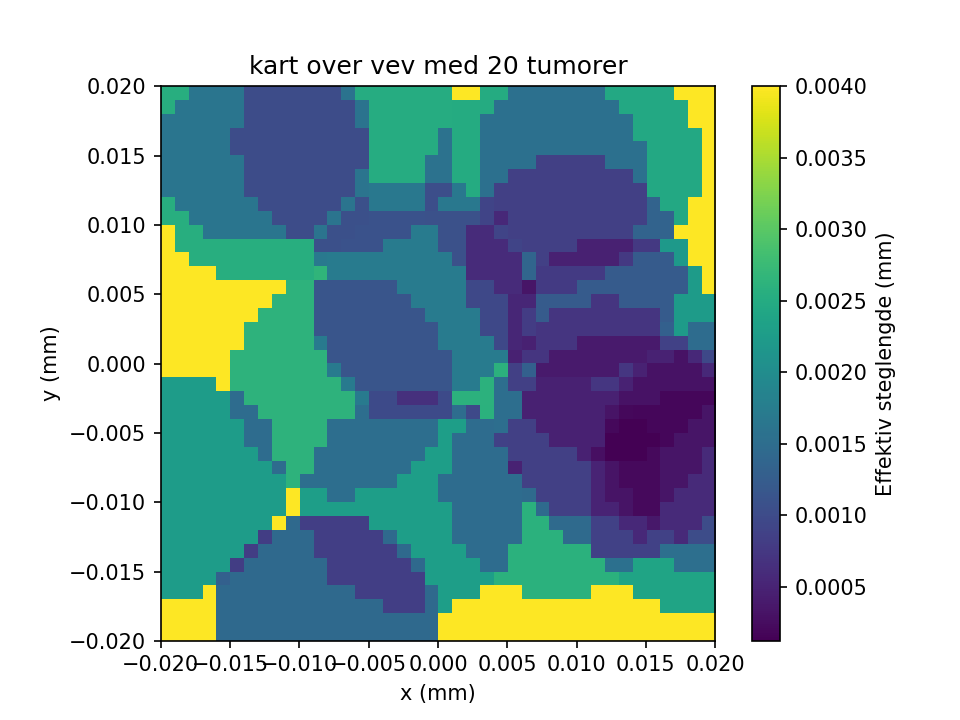

<IPython.core.display.Javascript object>


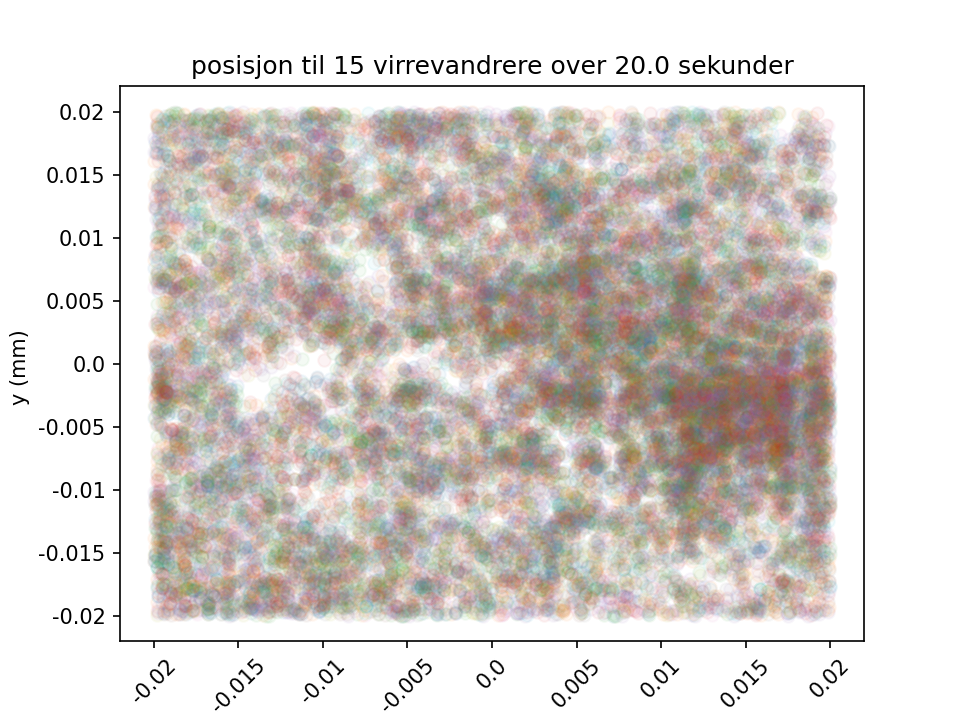

<IPython.core.display.Javascript object>


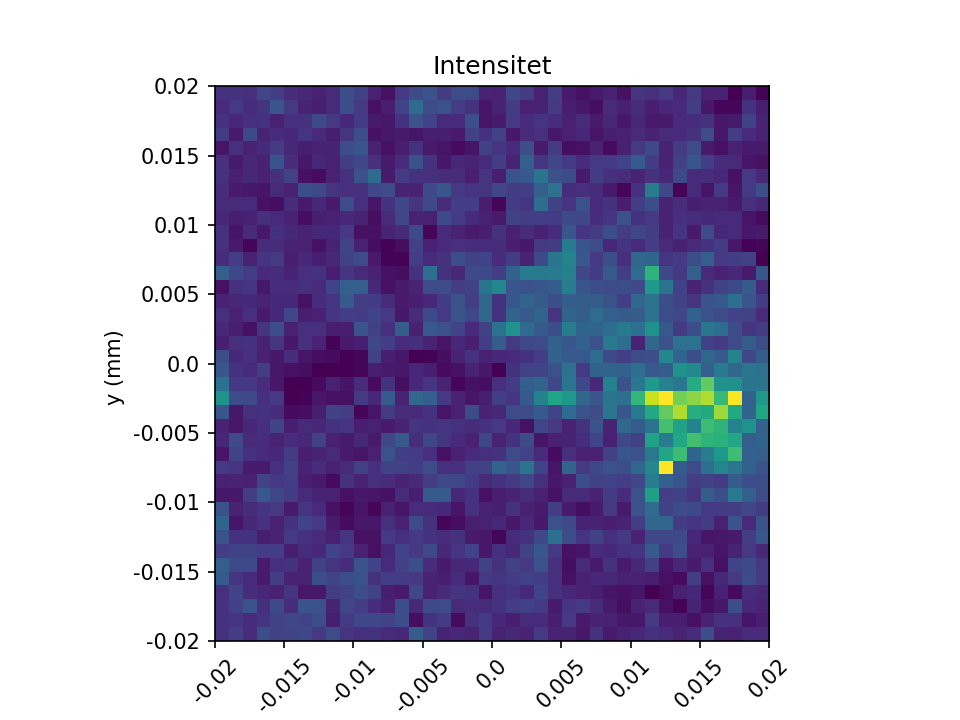

In [9]:
#--------------- parametre oppg 2f) ----------------

f_dt = 0.01             #lengde på et tidssteg (sekunder)
f_nx = 40               #antall steg x-retning
f_ny = 40               #antall steg y-retning
f_dx = 0.004            #stegnlengde friskt vev
f_lx = 0.04             #lengde x-akse
f_ly = 0.04             #lengde y-akse

f_N = 15                #antall virrevandrere
f_M = 2000              #antall tidssteg

f_m = 20                #antall tumorer
f_A = 0.0002            #areal tumorer
f_tk = np.random.uniform(0.3, 0.45, f_m)                      #tumorkoeffisientene
f_sentrum_X = np.random.uniform(-f_lx/2, f_lx/2, f_m)         #x-koord sentrum tumorer
f_sentrum_Y = np.random.uniform(-f_lx/2, f_lx/2, f_m)         #y-koord sentrum tumorer

#-------------------- Simulering oppg 2f) ----------------------------

f_tumorer = genSvulster(f_nx, f_ny, f_lx, f_ly,f_dx,  f_m, f_tk, f_A, f_sentrum_X, f_sentrum_Y)
f_vandrere = virrevandrere_blant_tumorer(f_N,f_M,f_dx, f_tumorer)
f_Intensitet = hjerneIntensitet(f_nx,f_ny, f_vandrere)

#Kun tumorerer:
plt.figure()
plt.imshow(f_tumorer,extent = [-f_lx/2, f_lx/2, -f_ly/2 , f_ly/2])
plt.title(f"kart over vev med {f_m} tumorer")
cbar = plt.colorbar()
cbar.set_label("Effektiv steglengde (mm)")
plt.xlabel(f"x (mm)")
plt.ylabel(f"y (mm)")
plt.show()

#Kun virrevandrere
plt.figure()
plt.plot(f_vandrere[0], f_vandrere[1], "o", alpha = 0.05)
plt.xticks(np.linspace(-f_nx/2,f_nx/2,9 ),np.linspace(-f_lx/2,f_lx/2,9).round(4), rotation=45)
plt.yticks(np.linspace(-f_ny/2,f_ny/2,9 ),np.linspace(-f_ly/2,f_ly/2,9).round(4))
plt.title(f"posisjon til {f_N} virrevandrere over {f_dt*f_M} sekunder")
plt.xlabel(f"x (mm)")
plt.ylabel(f"y (mm) ")
plt.show()

plt.figure()
plt.imshow(f_Intensitet, extent = [-f_nx/2, f_nx/2, -f_nx/2 , f_nx/2])
plt.xticks(np.linspace(-f_nx/2,f_nx/2,9 ),np.linspace(-f_lx/2,f_lx/2,9).round(4), rotation=45)
plt.yticks(np.linspace(-f_ny/2,f_ny/2,9 ),np.linspace(-f_ly/2,f_ly/2,9).round(4))
plt.title("Intensitet")
plt.xlabel(f"x (mm)")
plt.ylabel(f"y (mm) ")
plt.show()


Intensiteten kan brukes for å detektere tumorene, men den er ikke optimal. Det er tydelig hvor det har væt flere virrevandrere over tid pga mindre hastighet i tettere vev. Dermed kan man se omtrentlig posisjon på tumorer, spesielt om det ligger flere på samme sted slik at effektiv steglengde er ganske liten. Problemet er at formen er ganske utydelig. Grunnen er nok at forskjellen i effektiv steglengde mellom tumor og vev ikke er stor nok, slik at intensiteten ikke er altfor mye høyere i en tumor. En annen mulig forklaring er at man ikke simulerer nok virrevandrere, slik at man ikke får et godt bilde av hele arealet som skal undersøkes. Vi prøvde å minske dette problemet litt ved å gi virrevandrerne tilfeldig startposisjon, slik at ikke alle begynner i origo, og man får dekket et større område av arealet med færre tidssteg. 

**Oppgave 2g)** 

Skrive en liten intro kanskje. 

In [10]:
def sobel_filter(intensitet):
    '''
    Funksjonen oppretter arrayen til et intensitetsbilde ved hjelp av sobel-filteret 

    Input
    ----------
    intensitet    = normalisert array med antall ganger en virrevandrer har vært innenfor cellene i et areal
    
    Returns
    -------
    S = 2D matrise med ny intensitet funnet ved hjelp av sobel-filteret til virrevandrerne i hver av cellene 
    
    '''
    #Oppretter parametre
        
    nx = len(intensitet[0])
    ny = len(intensitet[1])
    
    X = np.zeros((nx-2, ny-2))
    Y = np.zeros((nx-2, ny-2))
    S = np.zeros((nx-2, ny-2))
    
    A = intensitet
    gx = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
    gy = np.array([[1, 2, 1],[0, 0 , 0],[-1, -2 ,-1]])
    
    #Tar i bruk sobel-filteret som finner intensiteten ved hjelp av hvor stor endringa er mellom to celler
    #bruker stegx og stegy til å endre oppløsninga
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            lokale_piksler = np.array([[A[i-1,j-1], A[i-1, j], A[i-1,j+1]],[A[i,j-1], A[i,j], A[i,j+1]],[A[i+1,j-1], A[i+1, j], A[i+1,j-1]]])
            X[i-1, j-1] = np.sum(lokale_piksler*gx)
            Y[i-1, j-1] = np.sum(lokale_piksler*gy)
            S[i-1, j-1] = np.sqrt(X[i-1, j-1]**2+Y[i-1,j-1]**2)
            
    #X = X/np.linalg.norm(X)
    #Y = Y/np.linalg.norm(Y)
    S = S/np.linalg.norm(S)
    
    return S

<IPython.core.display.Javascript object>


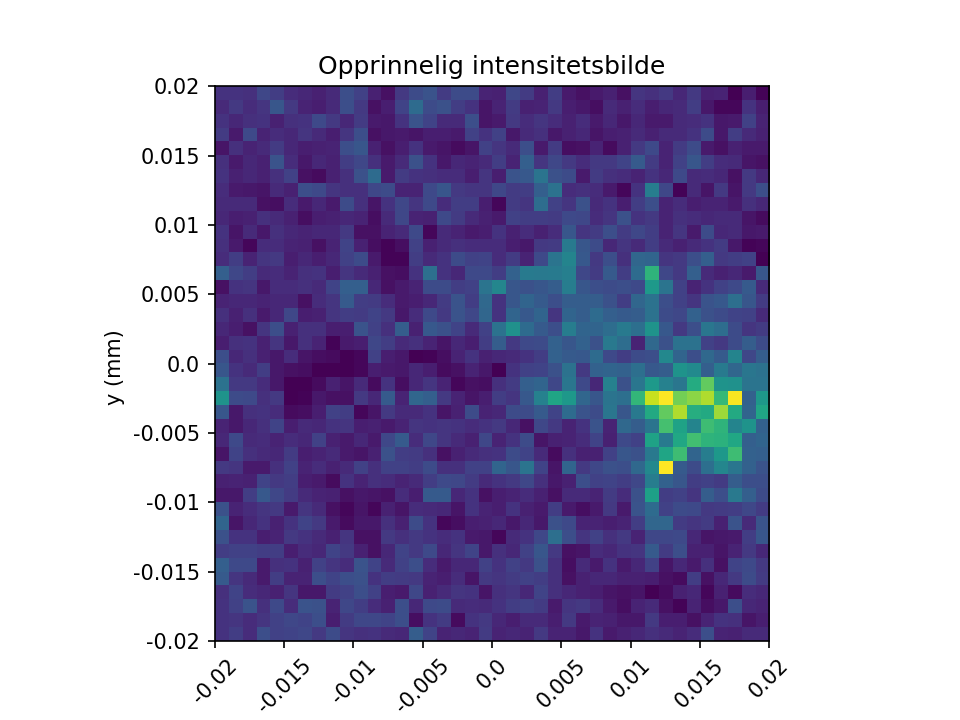

<IPython.core.display.Javascript object>


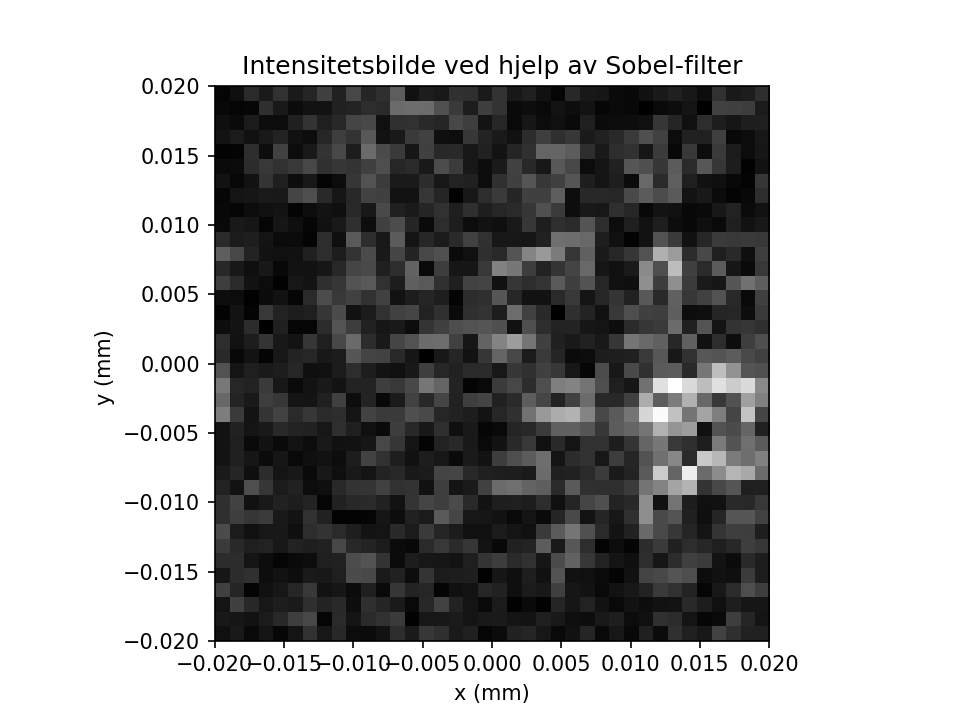

In [11]:

g_nx = 40         #for å endre oppløsning
g_ny = 40         #for å endre oppløsning
g_Intensitet = hjerneIntensitet(g_nx,g_ny, f_vandrere)
g_S = sobel_filter(g_Intensitet)


#Opprinnelig intensitetsbilde
plt.figure()
plt.imshow(g_Intensitet, extent = [-f_nx/2, f_nx/2, -f_nx/2 , f_nx/2])
plt.xticks(np.linspace(-f_nx/2,f_nx/2,9 ),np.linspace(-f_lx/2,f_lx/2,9).round(4), rotation=45)
plt.yticks(np.linspace(-f_ny/2,f_ny/2,9 ),np.linspace(-f_ly/2,f_ly/2,9).round(4))
plt.title("Opprinnelig intensitetsbilde")
plt.xlabel(f"x (mm)")
plt.ylabel(f"y (mm) ")
plt.show()

#Intensitetsbilde Sobel-filter
plt.figure()
plt.imshow(g_S,cmap = "Greys_r", extent = [-f_lx/2, f_lx/2, -f_ly/2 , f_ly/2])
plt.title("Intensitetsbilde ved hjelp av Sobel-filter")
plt.xlabel(f"x (mm)")
plt.ylabel(f"y (mm) ")
plt.show()


Ved å endre oppløsninga på intensiteten og dermed på sobel-filterets nye intensitetsbilde kan man øke eller minske sannsynligheten for å oppdage tumorer. Det er tydelig at for høy n fører til et mindre tydelig intensitetsbilde. Det er hovedsakelig to grunner til dette. For det første blir intensiteten normalisert. Det vil si at summen av verdien i hver piksel blir 1. Jo flere piksler man har jo lavere blir maksimal verdi per piksel til slutt. Dette vil gjøre at man ikke ser en like tydelig forskjell mellom tumor og friskt vev, siden disse blir nærmere hverandre i valørskalaen. Videre vil flere piksler før til en mer gradvis overgang i intensiteten. Sobelfilteret skal tydeliggjøre et bilde ved å se på raske endringer i intensitet, så dermed vi det ikke funke like godt med for høy n. Man må likevel passe på å ikke ha for lav oppløsning. Dette kan føre til at man har for få piksler til å kunne bestemme om man ser en tumor eller tilfeldigvis litt flere partikler på samme sted. Formen på tumoren blir også veldig vanskelig å bestemme med for liten n. Vi skjørte koden med flere verdier for n og kom fram til at en n mellom 30 og 50 var optimal for å få et godt bilde av tumorene når vi hadde en L på 0.04mm og tumor-areal på 0.0002 mm.  

### Konklusjon og oppsummering

Her kommer det en tekst. 